In [2]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
import IPython
import sklearn

In [3]:
#Import train dataset:
train = pd.read_csv('train.csv', header=0, sep=',', encoding='utf-8')
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
#create random sample to analize:
import random
train_sample = train.sample(20000)
train_sample.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.100500,10.686154,-1.673578,10.707075,6.800224,11.073502,-5.025288,5.420258,16.518129,0.295439,...,3.245160,7.418392,1.920146,3.362462,17.990662,-0.141260,2.304497,8.914770,15.879143,-3.324154
std,0.300673,3.047327,4.050851,2.622917,2.049071,1.615379,7.862905,0.866510,3.410889,3.336781,...,4.556127,3.036246,1.474982,3.975130,3.148846,1.432096,5.479548,0.918457,3.010289,10.431169
min,0.000000,1.283200,-14.032500,3.195800,0.255000,5.834300,-27.687900,2.641500,7.194300,-9.725800,...,-12.876700,-1.444800,-3.272300,-10.173200,9.827700,-4.895500,-13.508400,6.119000,7.233700,-35.174900
25%,0.000000,8.458225,-4.778525,8.739100,5.250075,9.884150,-11.129775,4.775700,13.928075,-2.322350,...,0.016750,5.110225,0.882550,0.624075,15.635100,-1.180350,-1.947000,8.258900,13.810975,-11.292350
50%,0.000000,10.508050,-1.670000,10.578150,6.838900,11.097850,-4.772850,5.396700,16.404400,0.388600,...,3.177850,7.343100,1.889350,3.419450,17.970850,-0.180650,2.365550,8.895950,15.945500,-2.748300
75%,0.000000,12.775250,1.363475,12.499075,8.326100,12.236500,0.973750,6.016425,19.095125,2.987050,...,6.423600,9.515300,2.916250,6.223950,20.401250,0.826350,6.563325,9.603725,18.061450,4.881825
max,1.000000,19.626500,8.971300,18.294100,12.991800,15.843300,16.083600,8.037900,27.691800,10.137700,...,18.440900,16.716500,7.611600,15.328000,26.983300,4.088100,17.332600,11.851100,25.260200,26.468800


In [5]:
#see balance of target:
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [6]:
#Create X matrix and y array:
X_train=train.iloc[:,2:].values
y_train=train.iloc[:,1].values

In [7]:
#Create X matrix and y array in sample:
X_train_sample=train_sample.iloc[:,2:].values
y_train_sample=train_sample.iloc[:,1].values

In [8]:
type(train_sample)

pandas.core.frame.DataFrame

In [9]:
pd.set_option('display.max_columns', 202)
train_sample.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
78261,train_78261,0,18.7738,-10.1874,13.8066,6.5353,9.5825,2.1589,6.7447,15.5951,3.0670,8.6076,1.7925,2.2787,14.1351,3.2532,11.7187,15.1187,11.4984,-20.3673,3.1408,30.8668,20.9897,14.2269,0.9286,2.7349,6.5713,13.6774,-0.0310,-2.4323,7.0389,3.5453,-12.5401,11.3405,-1.1605,14.2234,10.6382,8.2333,1.5125,6.6445,7.4391,4.7409,0.9457,16.4012,11.6567,11.2521,14.4674,0.6220,6.5286,-3.5279,14.4617,25.3758,12.3568,10.0157,4.3362,5.4214,-4.4994,8.1387,16.4537,6.5878,-5.7074,8.5058,21.0266,2.3212,2.4451,3.1842,6.0502,1.2968,2.9436,-0.5059,5.0315,-9.7745,5.3177,1.1688,-3.0914,29.7904,27.7249,14.2454,12.9386,21.4989,7.8157,16.1696,8.7540,16.5294,-7.6498,6.9179,-8.2190,21.5020,-8.6513,4.1961,11.0240,10.4301,-33.9820,7.2378,15.4974,10.3490,9.7762,-1.4876,1.4652,22.2114,1.7853,-0.2553,-15.2397,15.8082,31.8233,1.4743,9.9192,4.5744,11.2556,20.5054,14.4056,24.3545,5.7266,7.5080,6.1262,4.6849,2.7500,4.4044,5.8963,31.0710,-11.1411,2.5740,13.7038,11.9465,7.8176,4.0475,4.5789,12.1054,14.3696,1.6470,-6.8979,20.6991,11.6489,1.1091,6.8644,6.4674,3.5204,9.0633,42.1459,24.0170,-0.8298,10.5628,-1.1158,14.4204,17.2485,9.4524,9.1201,3.3421,8.5356,-7.1745,3.8522,12.1828,20.0295,8.8078,12.9458,15.7523,12.2228,11.5435,11.4804,-5.2645,21.0346,13.1627,31.5803,5.8773,6.7407,14.9950,-3.3370,15.8254,2.8158,-11.8032,8.3280,6.2064,-0.5080,-0.1345,27.0581,-1.0129,18.0999,9.6803,-2.6802,12.5052,5.8460,1.1762,-4.9448,10.5350,-2.9632,12.6389,10.7493,-1.1741,12.6896,4.4781,17.0063,1.4206,8.9139,13.7306,1.1926,-8.0814,16.4505,-0.4073,12.7667,9.0548,15.2662,9.0268
145096,train_145096,1,12.1140,-3.4199,9.5884,7.1580,9.6077,-9.9488,4.8912,21.3770,1.6963,6.4407,-8.8219,-1.6545,14.1690,3.7442,9.8673,14.4802,7.8680,-2.6938,6.0373,5.4894,9.7756,31.6189,-0.2219,3.7392,11.3585,13.8506,-0.6828,-0.5909,4.3754,1.9660,-13.0070,8.9587,-0.6349,11.2495,11.0084,6.3544,-5.5151,9.0677,14.2314,-6.1065,-5.1409,14.1234,11.4370,11.2723,14.9081,-26.4224,10.5024,-5.4659,23.8143,-0.0372,13.5334,4.9884,6.3252,7.6296,-13.9742,4.9948,18.5740,5.3899,7.4025,10.3276,11.3734,-21.0380,-0.8608,3.6109,5.5084,-0.2063,3.6301,11.1487,5.0245,6.1503,22.0104,0.6581,3.6275,25.5475,3.0968,16.7921,6.5666,18.8997,4.0174,14.2984,-3.4377,16.4216,-8.2780,13.8239,10.5095,18.5053,4.7283,2.7289,9.0364,3.2526,-4.7154,7.1534,17.4194,10.3655,8.3340,-0.1292,5.7499,16.9951,2.2514,-1.3030,-7.2637,18.9693,20.2419,1.2957,11.5302,4.0280,10.0559,23.6120,14.3348,10.5043,5.7732,7.4769,1.9064,5.2690,2.8353,5.7449,1.1792,17.1048,-4.9839,4.1083,33.2308,10.1164,-0

In [10]:
train_sample.drop(['ID_code'],axis=1,inplace=True)

In [11]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
train_sample_scaled = pd.DataFrame(min_max_scaler.fit_transform(train_sample))

/home/ainhoa/anaconda3/envs/kschool/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:
train_sample_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200
0,0.0,0.953514,0.167151,0.702781,0.493083,0.374483,0.681877,0.760359,0.409845,0.644036,0.672390,0.571067,0.670898,0.556646,0.304910,0.807011,0.777876,0.602949,0.181502,0.239023,0.913959,0.701908,0.408242,0.285622,0.374389,0.302418,0.509862,0.593910,0.384085,0.801361,0.440475,0.434385,0.539745,0.479251,0.466550,0.217582,0.650433,0.441895,0.593058,0.373329,0.674869,0.696638,0.727836,0.623420,0.275345,0.613669,0.572673,0.220275,0.659679,0.466234,0.692320,0.350177,0.442079,0.758442,0.432396,0.395488,0.363795,0.535523,0.557932,0.191354,0.335262,0.867033,0.672970,0.634910,0.688424,0.463427,0.515947,0.119959,0.266967,0.686354,0.212331,0.290284,0.775698,0.332018,0.697591,0.589086,0.399759,0.611126,0.587311,0.729494,0.737125,0.578995,0.562007,0.454314,0.607459,0.394347,0.612532,0.164397,0.332972,0.614201,0.862807,0.295785,0.761310,0.607244,0.464548,0.430814,0.217190,0.259271,0.549484,0.461442,0.594866,0.386545,0.542670,0.662439,0.404599,0.373346,0.578082,0.754824,0.483616,0.698452,0.704941,0.533823,0.673743,0.816017,0.366462,0.409054,0.615831,0.847214,0.684925,0.421491,0.476360,0.361747,0.497427,0.715517,0.417370,0.559679,0.280494,0.760629,0.542362,0.220397,0.703259,0.361419,0.718799,0.389328,0.342693,0.798995,0.850234,0.847342,0.624217,0.419848,0.527131,0.347892,0.779558,0.617282,0.307707,0.613364,0.469796,0.408042,0.453860,0.338767,0.595289,0.683793,0.464791,0.765696,0.346873,0.665594,0.862493,0.162961,0.494251,0.525281,0.595287,0.578540,0.689304,0.651396,0.643506,0.510064,0.356422,0.372330,0.388311,0.694442,0.733618,0.461256,0.552801,0.592071,0.534066,0.465822,0.384565,0.543747,0.533977,0.620714,0.405017,0.461140,0.561518,0.432423,0.625028,0.441941,0.613307,0.654588,0.737177,0.518412,0.630979,0.695794,0.835590,0.410230,0.082028,0.386043,0.499599,0.851954,0.512168,0.445594,0.717051
1,1.0,0.590450,0.461341,0.423399,0.541973,0.377001,0.405266,0.416889,0.691923,0.575030,0.342863,0.285636,0.573721,0.586628,0.324082,0.667446,0.508091,0.379544,0.594209,0.296115,0.362140,0.349783,0.726904,0.225481,0.684876,0.515982,0.607193,0.577057,0.607413,0.293612,0.341048,0.424152,0.394276,0.514088,0.352000,0.332784,0.595726,0.107190,0.788787,0.602384,0.283963,0.571674,0.655346,0.571499,0.286486,0.624868,0.375837,0.437780,0.627068,0.593372,0.154209,0.608447,0.340670,0.810358,0.925078,0.216893,0.265582,0.628127,0.333346,0.617783,0.683166,0.478051,0.348942,0.376479,0.709805,0.403134,0.465542,0.210465,0.495438,0.543788,0.907877,0.507137,0.463228,0.603137,0.603498,0.341367,0.469524,0.488040,0.466283,0.397808,0.476036,0.315565,0.554183,0.441477,0.760151,0.871241,0.472267,0.450351,0.292890,0.479523,0.521702,0.683330,0.668857,0.682685,0.468966,0.335441,0.566133,0.340813,0.482261,0.559249,0.499233,0.522861,0.657368,0.461989,0.249631,0.491148,0.487807,0.666600,0.545616,0.624909,0.174528,0.535618,0.669206,0.356299,0.390085,0.422199,0.694346,0.361891,0.529763,0.521016,0.538606,0.579767,0.325858,0.470303,0.616871,0.401953,0.285241,0.744718,0.623200,0.651189,0.538264,0.521791,0.643086,0.267975,0.584241,0.559507,0.601936,0.572766,0.454104,0.592076,0.538350,0.451957,0.502291,0.431854,0.503509,0.370669,0.504752,0.583063,0.850012,0.525624,0.241195,0.628443,0.718840,0.432467,0.218221,0.629579,0.573926,0.639552,0.588641,0.356988,0.274264,0.370602,0.526406,0.720455,0.629657,0.729071,0.169603

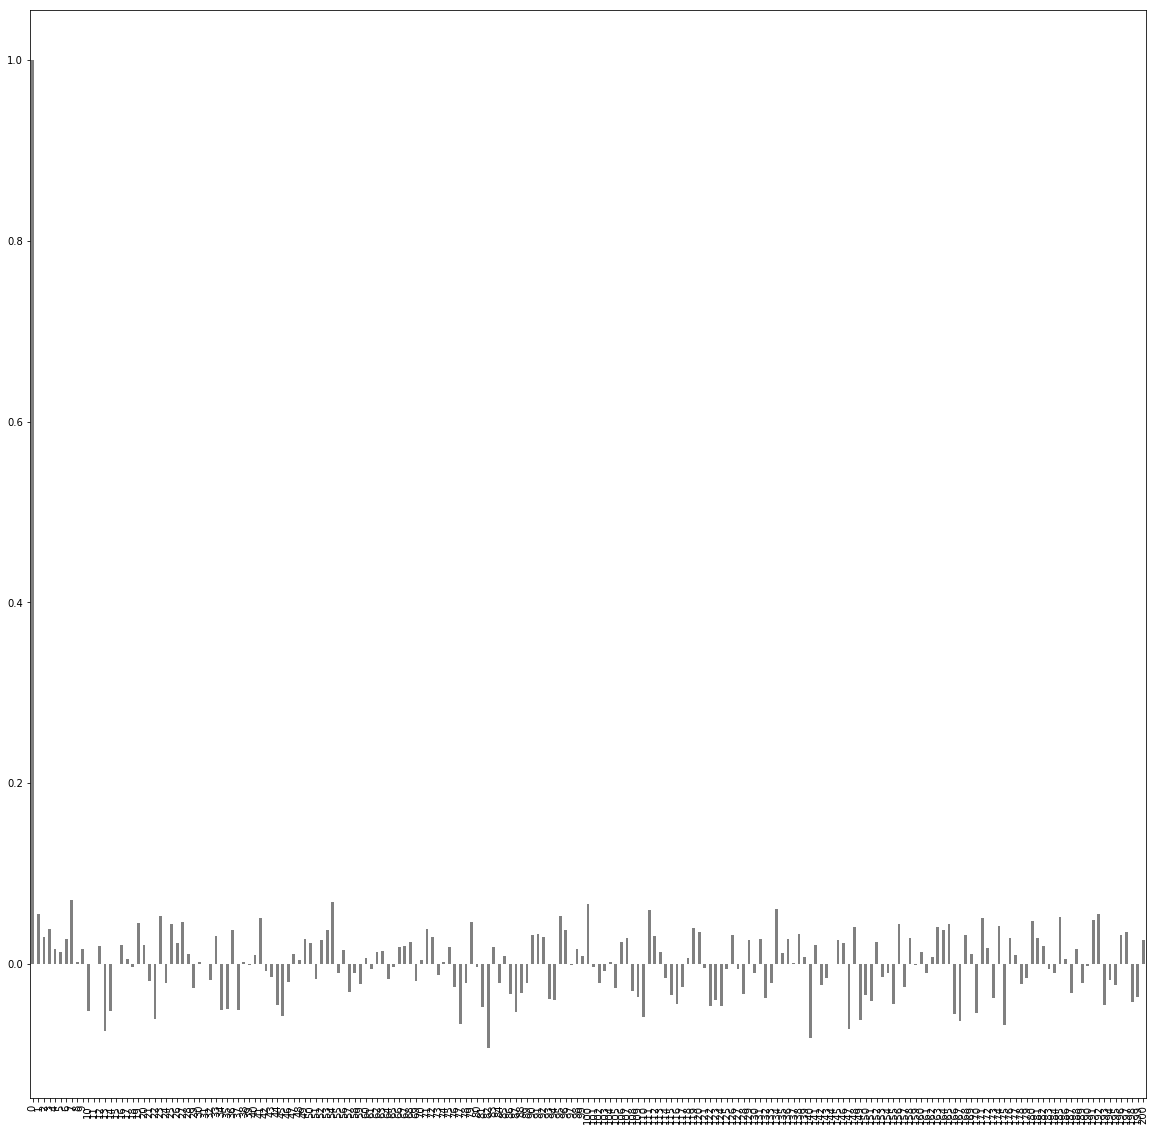

In [13]:
autocor = train_sample_scaled.corr()[0]
autocor.plot(kind='bar',color='gray',figsize=(20,20))

In [14]:
autocor_df = pd.DataFrame({'index':autocor.index, 'autocor':autocor.values} )
autocor_df.describe()

,index,autocor
count,201.000000,201.000000
mean,100.000000,0.005196
std,58.167861,0.078293
min,0.000000,-0.093101
25%,50.000000,-0.022506
50%,100.000000,0.002399
75%,150.000000,0.027356
max,200.000000,1.000000


In [15]:
autocor_df['Absolute_corr']=abs(autocor_df['autocor'])
autocor_df.describe()

,index,autocor,Absolute_corr
count,201.000000,201.000000,201.000000
mean,100.000000,0.005196,0.033069
std,58.167861,0.078293,0.071119
min,0.000000,-0.093101,0.000057
25%,50.000000,-0.022506,0.013530
50%,100.000000,0.002399,0.026077
75%,150.000000,0.027356,0.040890
max,200.000000,1.000000,1.000000


In [16]:
#Let's check the most correlated variables:
print(autocor_df.loc[autocor_df['Absolute_corr'] > 0.05])

     index   autocor  Absolute_corr
0        0  1.000000       1.000000
1        1  0.055801       0.055801
7        7  0.070744       0.070744
10      10 -0.051464       0.051464
13      13 -0.073628       0.073628
14      14 -0.051863       0.051863
22      22 -0.060308       0.060308
23      23  0.053076       0.053076
34      34 -0.051301       0.051301
37      37 -0.050379       0.050379
41      41  0.050800       0.050800
45      45 -0.057905       0.057905
54      54  0.068366       0.068366
77      77 -0.066061       0.066061
82      82 -0.093101       0.093101
87      87 -0.053343       0.053343
95      95  0.053634       0.053634
100    100  0.066401       0.066401
110    110 -0.058856       0.058856
111    111  0.060183       0.060183
134    134  0.060920       0.060920
140    140 -0.081941       0.081941
147    147 -0.072164       0.072164
149    149 -0.061432       0.061432
166    166 -0.054772       0.054772
167    167 -0.062676       0.062676
170    170 -0.053857       0

As the index 0 corresponds to the target, our most correlated variables would be (substract 1 to the index in autocor):
- Variable 0
- Variable 1
- Variable 2
- Variable 6
- Variable 12
- Variable 13
- Variable 21
- Variable 22
- Variable 26
- Variable 44
- Variable 53
- Variable 76
- Variable 80
- Variable 81
- Variable 99
- Variable 109
- Variable 110
- Variable 115
- Variable 122
- Variable 133
- Variable 139
- Variable 146
- Variable 154
- Variable 166
- Variable 174
- Variable 184
- Variable 190
- Variable 191
- Variable 198

These will be our key features to train our models. Now let's analyze how correlated they are between them

In [17]:
import seaborn as sns
traina = train[['target','var_0','var_1','var_2','var_6','var_12','var_13','var_21','var_22','var_26','var_44','var_53','var_76','var_80','var_81','var_99','var_109','var_110','var_115','var_122','var_133','var_139','var_146','var_154','var_166','var_174','var_184','var_190','var_191','var_198']]
corr = traina.corr()
fig, ax = plt.subplots(figsize = (200,200))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt='.2f')
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [18]:
corr

,target,var_0,var_1,var_2,var_6,var_12,var_13,var_21,var_22,var_26,var_44,var_53,var_76,var_80,var_81,var_99,var_109,var_110,var_115,var_122,var_133,var_139,var_146,var_154,var_166,var_174,var_184,var_190,var_191,var_198
target,1.000000,0.052390,0.050343,0.055870,0.066731,-0.069489,-0.055156,-0.058483,0.060558,0.062422,-0.049039,0.063399,-0.061917,-0.057609,-0.080917,0.058367,-0.049926,0.064275,-0.050174,-0.042461,0.054548,-0.074080,-0.063644,-0.046106,-0.057773,-0.061669,0.048315,0.055973,0.047114,-0.053000
var_0,0.052390,1.000000,-0.000544,0.006573,0.006983,-0.001996,-0.002717,0.000781,0.002322,0.006117,-0.003003,0.001259,-0.007175,-0.002882,-0.005575,0.003813,-0.004159,0.005662,0.000657,-0.000987,0.002628,-0.006375,0.001057,-0.003217,-0.007269,-0.000683,-0.000554,0.002752,0.000206,-0.005776
var_1,0.050343,-0.000544,1.000000,0.003980,0.003258,-0.001977,-0.001303,-0.001519,0.001762,0.004778,-0.006390,0.005195,-0.003618,-0.008855,-0.003067,0.004871,-0.001107,0.003149,-0.007184,-0.003530,0.002001,0.001122,-0.005011,-0.001171,-0.006578,-0.004758,-0.000248,0.006627,0.003621,-0.004861
var_2,0.055870,0.006573,0.003980,1.000000,0.000883,-0.003781,-0.008795,-0.006885,0.000297,0.006138,0.001792,0.000884,-0.007217,-0.007989,-0.003156,0.005606,-0.001168,0.005198,-0.003256,-0.003953,0.000026,-0.002899,-0.004508,-0.005367,-0.006253,-0.006836,0.003259,0.000197,0.001285,-0.000877
var_6,0.066731,0.006983,0.003258,0.000883,1.000000,-0.003376,-0.005506,-0.004875,0.002249,0.004878,-0.006018,0.002892,-0.003829,-0.008958,-0.003343,0.004929,-0.001644,0.002941,-0.004824,-0.000699,0.003010,-0.004923,-0.002253,-0.001448,-0.003268,-0.005838,0.003794,0.000721,0.005604,-0.003025
var_12,-0.069489,-0.001996,-0.001977,-0.003781,-0.003376,1.000000,0.004388,0.005009,-0.002870,-0.006369,-0.001915,-0.004687,0.004986,0.005781,0.006348,-0.007828,0.005306,-0.004681,0.002991,0.002866,-0.002278,0.005572,0.008591,0.004315,0.007929,0.003896,-0.003138,0.002374,-0.004543,0.007545
var_13,-0.055156,-0.002717,-0.001303,-0.008795,-0.005506,0.004388,1.000000,0.001768,-0.000348,-0.006754,0.007843,-0.001641,0.002737,0.002158,0.004111,-0.002336,0.002195,-0.002239,0.001357,0.004772,-0.002590,0.004409,0.003695,0.005432,0.003091,0.001611,-0.003026,-0.000363,-0.001452,-0.001896
var_21,-0.058483,0.000781,-0.001519,-0.006885,-0.004875,0.005009,0.001768,1.000000,-0.004416,-0.002879,0.003104,-0.005890,0.001515,0.006905,0.004760,-0.002961,-0.000677,-0.002232,0.004135,0.000810,-0.004098,0.002142,0.002992,0.005355,0.001848,0.004049,-0.001279,-0.002349,-0.002436,0.001164
var_22,0.060558,0.002322,0.001762,0.000297,0.002249,-0.002870,-0.000348,-0.004416,1.000000,-0.000397,-0.002041,0.001969,-0.002936,-0.004521,-0.005671,0.003314,0.002483,0.003665,-0.001870,-0.001326,-0.001173,-0.007158,-0.001589,-0.003235,-0.003749,-0.005374,0.001679,0.003199,-0.000231,-0.005303
var_26,0.062422,0.006117,0.004778,0.006138,0.004878,-0.006369,-0.006754,-0.002879,-0.000397,1.000000,0.000784,0.002488,0.000477,-0.000983,-0.002602,0.002782,-0.003635,0.001782,0.000201,-0.005070,0.003213,-0.009844,-0.005043,-0.001180,-0.007532,-0.005194,0.005484,0.002837,0.000113,-0.005124


Let's train a PCA model and see how well it fits

In [19]:
#Create X matrix and y array:
X_train=traina.iloc[:,1:].values
y_train=traina.iloc[:,0].values

In [20]:
#Standardize the data:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X_train)

In [21]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns=['PC1', 'PC2'])
finalDf = pd.concat([principalDf, traina[['target']]], axis=1)

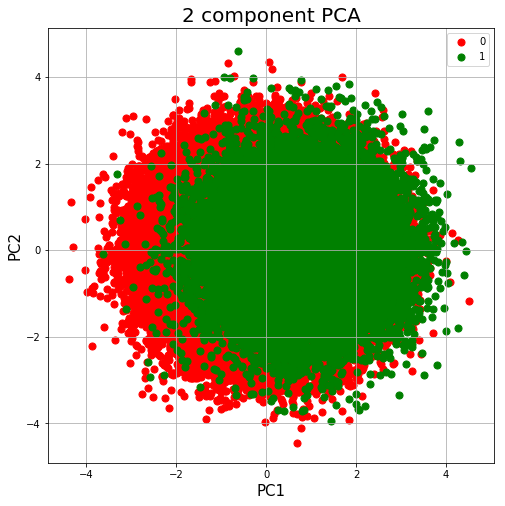

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [23]:
finalDf.head(20)

,PC1,PC2,target
0,-1.464860,-0.376110,0
1,1.441481,-0.312183,0
2,-0.027256,-0.493052,0
3,0.689380,-0.439094,0
4,0.044300,0.005686,0
5,-0.827618,-0.539891,0
6,0.923176,-0.163561,0
7,0.765627,-0.430867,0
8,0.954551,0.573379,0
9,0.967736,-0.210199,0


    ##LOGISTIC REGRESSION##

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/ainhoa/anaconda3/envs/kschool/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


Now: let's predict with the real test dataset and generate the submission file

In [26]:
#Import test dataset:
test = pd.read_csv('test.csv', header=0, sep=',', encoding='utf-8')
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,-15.6305,18.8766,11.2864,11.8362,13.3680,-31.9891,12.1776,8.7714,17.2011,16.8508,13.0534,14.4069,-4.8525,7.3213,-0.5259,16.6365,19.3036,6.4129,-5.3948,9.3269,11.9314,-3.5750,-0.7706,0.8705,6.9282,2.8914,5.9744,17.4851,5.0125,-1.4230,33.3401,0.8018,-4.7906,30.2708,26.8339,21.7205,7.3075,14.0810,3.1192,17.4265,9.4883,16.9060,14.5117,10.0276,-0.9706,20.4588,4.7945,20.4160,13.1633,7.9307,-7.6509,7.0834,15.2324,10.1416,5.9156,-0.5775,5.7600,30.3238,2.1251,1.8585,-9.2198,17.3089,30.9548,1.4918,12.8721,3.4902,8.2856,11.9794,14.0176,15.0763,3.7662,6.0426,4.4243,14.1799,2.0921,1.5493,3.2206,0.0172,-6.6602,8.4785,42.0248,11.4164,0.4564,9.4006,0.9685,12.4929,14.1240,4.0388,-4.4442,16.6684,12.5380,0.9205,10.5998,7.5147,-4.1748,-0.4824,10.5267,17.7547,-6.5226,-2.5502,-5.1547,-2.1246,19.8319,13.0752,9.2275,3.0213,11.6793,-11.6827,4.1017,5.2954,18.7741,9.8892,7.5219,14.9745,18.9880,1.0842,11.9125,-4.5103,16.1361,11.0067,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,10.0309,3.1337,10.5742,11.7664,2.1782,-41.1924,13.5322,-17.3834,6.3806,12.5589,11.6887,25.3930,1.5776,6.8481,8.7348,16.4239,21.7056,6.9345,1.6678,9.5249,5.3383,-18.7083,1.3382,-1.7401,5.8398,3.1051,4.4307,16.0005,5.0306,-7.3365,12.2806,0.6992,-0.7772,21.5123,6.7803,18.1896,6.9388,22.1336,6.3755,13.1525,1.9772,14.0406,6.6904,9.9732,-11.5679,20.4525,9.4951,9.6343,8.1252,2.6059,-17.4201,7.1848,15.3484,10.6522,5.9897,0.3392,10.3516,29.8204,1.9998,-1.4166,-1.7257,15.4712,35.6020,1.6570,13.0783,2.7752,6.4986,4.6835,13.7963,17.7261,1.7375,5.5689,3.6609,8.9725,4.1159,1.0693,2.0234,8.2760,-6.8610,0.2780,17.0488,11.6704,3.1215,8.5093,5.6367,12.0099,14.2372,-

In [29]:
testa = test[['ID_code','var_0','var_1','var_2','var_6','var_12','var_13','var_21','var_22','var_26','var_44','var_53','var_76','var_80','var_81','var_99','var_109','var_110','var_115','var_122','var_133','var_139','var_146','var_154','var_166','var_174','var_184','var_190','var_191','var_198']]
testa.head()

,ID_code,var_0,var_1,var_2,var_6,var_12,var_13,var_21,var_22,var_26,var_44,var_53,var_76,var_80,var_81,var_99,var_109,var_110,var_115,var_122,var_133,var_139,var_146,var_154,var_166,var_174,var_184,var_190,var_191,var_198
0,test_0,11.0656,7.7798,12.9536,5.8493,13.9696,0.3458,18.8064,1.5899,-9.4902,13.3680,7.3213,7.3075,9.4883,16.9060,1.8585,15.0763,3.7662,1.5493,0.4564,7.5147,-2.5502,11.6793,18.9880,2.5531,18.1317,31.3521,-2.1556,11.8495,15.4722
1,test_1,8.5304,1.2543,11.3047,6.0196,14.1129,2.5667,3.1389,5.2578,-5.2341,2.1782,6.8481,6.9388,1.9772,14.0406,-1.4166,17.7261,1.7375,1.0693,3.1215,7.0891,6.7530,8.7644,7.7732,3.2185,10.5018,25.1958,10.6165,8.8349,19.1293
2,test_2,5.4827,-10.3581,10.1407,4.8950,13.6751,3.8183,12.3696,4.7473,-15.4246,8.3565,5.6510,-9.7077,16.1691,14.3299,1.7818,19.4604,8.6896,2.3797,4.7688,6.5950,-6.0452,11.6749,7.2638,3.1243,27.4035,24.4721,-0.7484,10.9935,19.8956
3,test_3,8.5374,-1.3222,12.0220,4.9397,14.0526,13.5010,12.5527,2.9707,1.0061,6.6917,6.2536,12.5465,17.5941,15.4375,2.6165,23.0368,10.3445,4.0592,8.4676,6.7888,12.7898,8.6963,5.0372,2.6415,14.5499,8.1154,9.5702,9.0766,13.0168
4,test_4,11.7058,-0.1327,14.1295,6.8595,14.1013,8.9672,16.3059,6.7954,8.6228,18.9670,5.6794,8.1522,11.8133,16.7661,0.1148,16.0638,6.3933,3.4218,-1.2978,7.1434,11.7989,12.9327,3.4368,3.2348,14.0037,3.9829,4.2259,9.1723,13.9260


In [31]:
X_test_final = testa.iloc[:,1:].values

In [32]:
y_pred_final = logreg.predict(X_test_final)

In [33]:
type(y_pred_final)

numpy.ndarray

In [34]:
pd.DataFrame(y_pred_final).to_csv('prediction_v0.csv')

The score for the prediction is 0.52